In [1]:
import sys, os
from statistics import mean

In [2]:
sys.path.append(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from src.utils.paths_manager import LFPW_RAW_SOURCE_PATH, HELEN_RAW_SOURCE_PATH
from src.dataset.loaders import LFPWDataset, HelenDataset, FaceLandmarkDataloaderContext

In [3]:
dloader_ctx = FaceLandmarkDataloaderContext()
dloader_ctx.dloader = LFPWDataset(LFPW_RAW_SOURCE_PATH)
dloader_ctx.check_valid()

True

In [4]:
im_list = [i for i in dloader_ctx.load('test')]

In [5]:
STANDARD_FACE_WIDTH = 300
STANDARD_FACE_HEIGHT = 420

In [6]:
im = im_list[15]

In [7]:
leftmost = min([x[0] for x in im.landmarks.face])
rightmost = max([x[0] for x in im.landmarks.face])

face_width = rightmost - leftmost
scaling_factor = STANDARD_FACE_WIDTH / face_width

In [8]:
im = im.uniform_scale(scaling_factor)

Image path is ignored


In [9]:
leftmost = min([x[0] for x in im.landmarks.face])
rightmost = max([x[0] for x in im.landmarks.face])

face_outline_cluster = im.landmarks.face + im.landmarks.left_brow + im.landmarks.right_brow
y_median = mean([y[1] for y in face_outline_cluster])

im = im.crop(left=leftmost,right=rightmost, top=y_median-STANDARD_FACE_HEIGHT/2, bottom=y_median+STANDARD_FACE_HEIGHT/2)


Image path is ignored


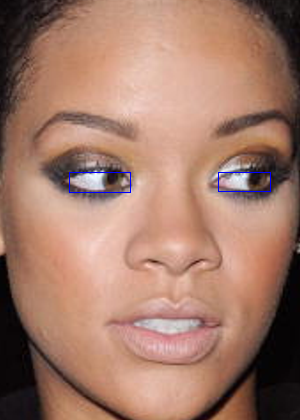

In [14]:
bbox_img = im.create_bbox_image()
bbox_img.draw_bbox(color='blue',eyes=True)

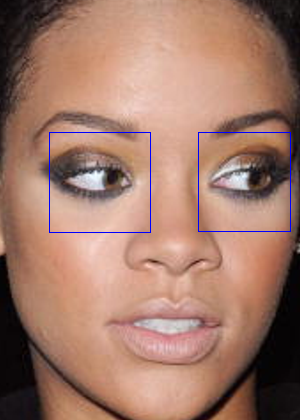

In [15]:
# new_img = bbox_img.scale_bbox('right_eye', (1.5,1.5,1.5,1.5))
# new_img = new_img.scale_bbox('left_eye', 2)
# new_img = bbox_img.scale_bbox('left_eye', (2,5,2,5)).scale_bbox('right_eye', (2,5,2,5))
new_img = bbox_img.pad_bbox('left_eye', (20, 40, 20, 40)).pad_bbox('right_eye', (20, 40, 20, 40))
new_img.draw_bbox(color='blue',eyes=True)


In [16]:
del bbox_img
del new_img